<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/mini_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from google.colab import files
import io
import sklearn.linear_model as lm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
selected_columns = ['location','size','total_sqft','price']
df = pd.read_csv('Bengaluru_House_Data.csv', usecols=selected_columns, nrows=100)
df['total_sqft']=pd.to_numeric(df['total_sqft'], errors = 'coerce')
df['size'] = df['size'].str.extract('(\d+)').astype(int)
le = LabelEncoder()
df['']
df=df.dropna()
print(df)
df.describe()


AttributeError: ignored

In [ ]:
df.describe()


,total_sqft,price
count,97.000000,97.000000
mean,1510.708660,105.327732
std,856.340381,105.045751
min,460.000000,15.000000
25%,1070.000000,47.000000
50%,1270.000000,70.000000
75%,1665.000000,122.000000
max,5700.000000,650.000000


In [ ]:
df.isnull().sum()

location            0
size                0
total_sqft          0
price               0
loc_LabelEncoded    0
dtype: int64

In [ ]:
df['size'] = df['size'].str.extract('(\d+)').astype(int)
df.describe()


AttributeError: ignored

In [ ]:
print(df['size'].value_counts())
print(df['location'].value_counts())
print(df['loc_LabelEncoded'].value_counts())

2    41
3    36
4     8
6     5
1     4
8     3
Name: size, dtype: int64
Whitefield          7
Kanakpura Road      4
Yelahanka           3
Electronic City     3
Bisuvanahalli       2
                   ..
Chikka Tirupathi    1
HSR Layout          1
KR Puram            1
Himagiri Meadows    1
T Dasarahalli       1
Name: location, Length: 70, dtype: int64
69    7
39    4
70    3
21    3
8     2
     ..
10    1
30    1
37    1
35    1
64    1
Name: loc_LabelEncoded, Length: 70, dtype: int64


<Figure size 1600x1000 with 0 Axes>

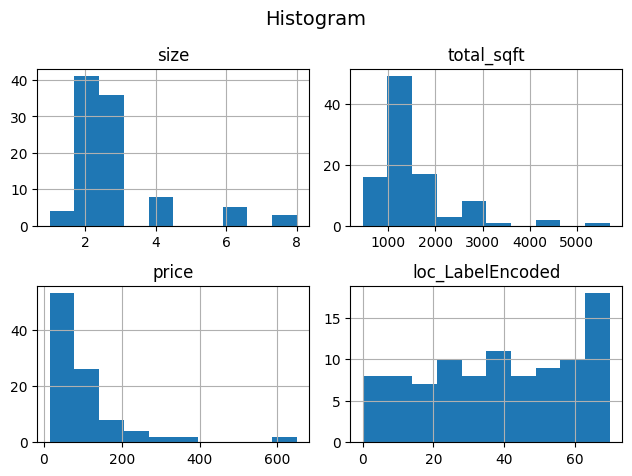

In [ ]:
plt.figure(figsize=(16,10))
df.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

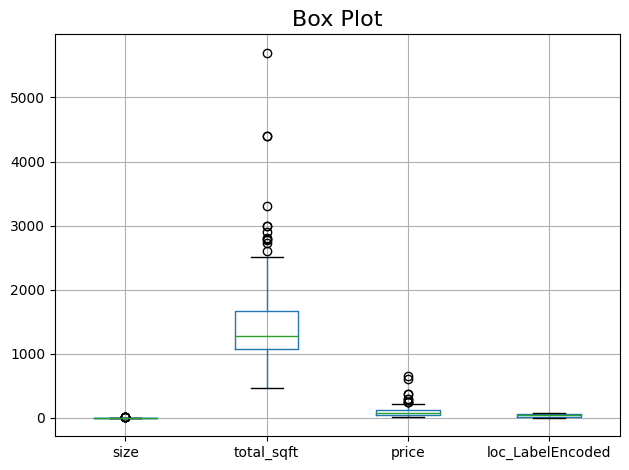

In [ ]:
df.boxplot()
plt.title("Box Plot", fontsize = 16)
plt.tight_layout()
plt.show()

<ipython-input-111-a3c8488acddd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='size').mean()
<ipython-input-111-a3c8488acddd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='size').mean().plot(kind='bar')


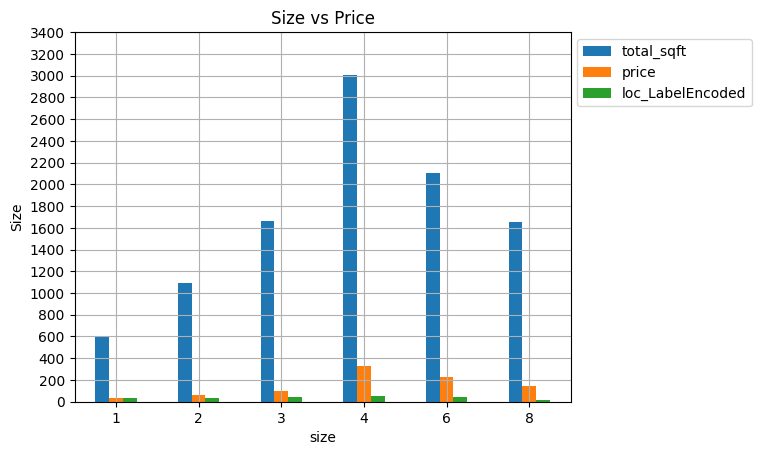

In [ ]:
df.groupby(by='size').mean()
df.groupby(by='size').mean().plot(kind='bar')
plt.title('Size vs Price')
plt.ylabel('Size')
plt.yticks(range(0,3500,200))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))


In [ ]:
corr=df.corr()
print(corr)

                      size  total_sqft     price  loc_LabelEncoded
size              1.000000    0.417906  0.482598         -0.039967
total_sqft        0.417906    1.000000  0.763107          0.227822
price             0.482598    0.763107  1.000000          0.233166
loc_LabelEncoded -0.039967    0.227822  0.233166          1.000000


<ipython-input-112-a35e05d9e19d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


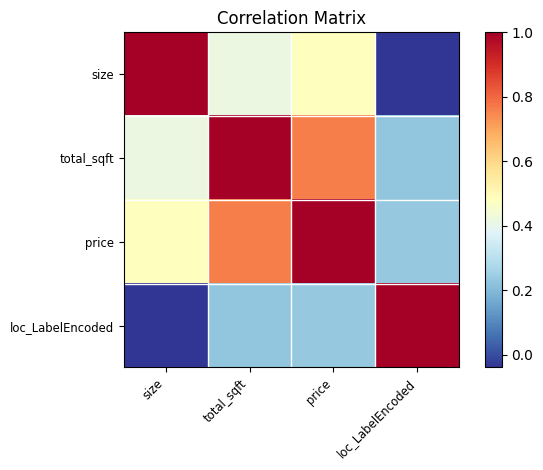

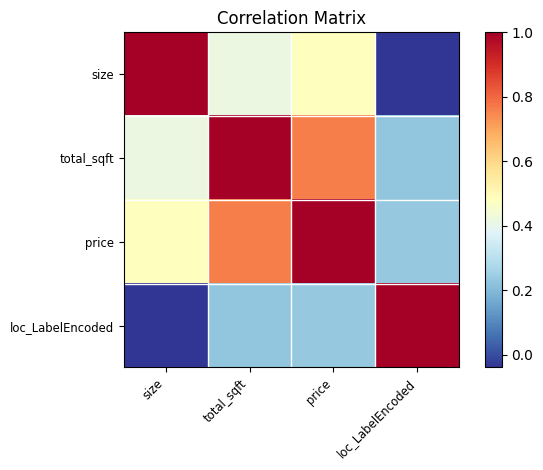

In [ ]:
sm.graphics.plot_corr(corr, xnames=list(corr.columns))


Text(0.5, 0.98, 'Pair Plot')

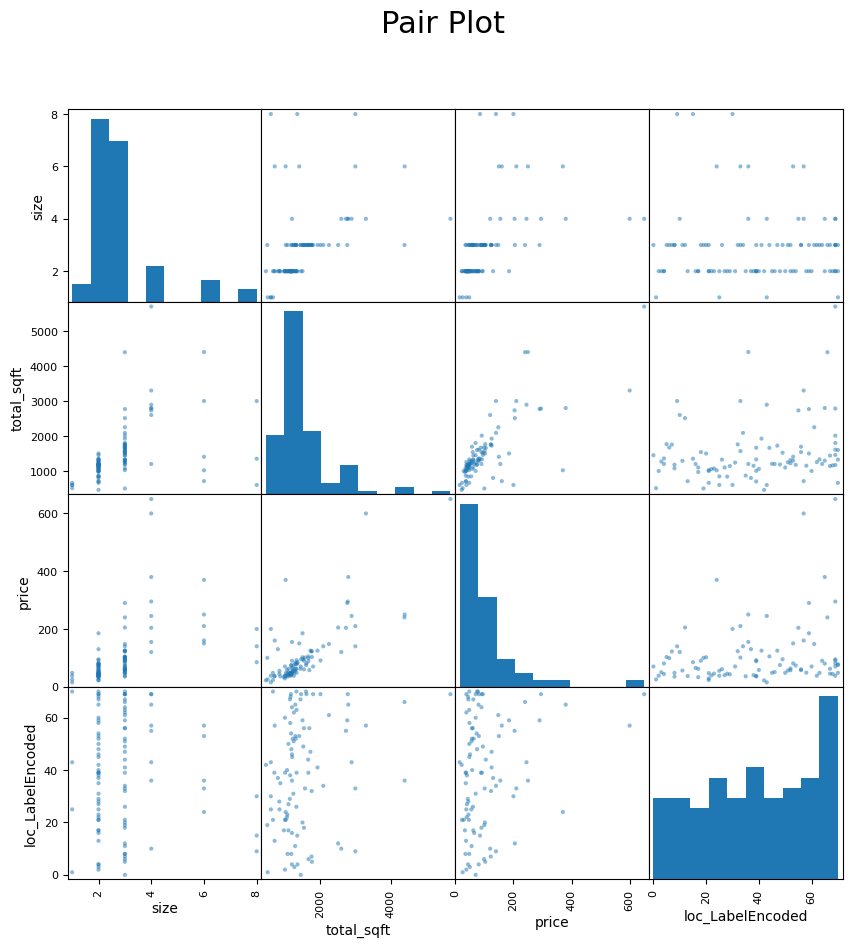

In [ ]:
scatter_matrix(df, figsize=(10,10))
plt.suptitle("Pair Plot", fontsize=22)

In [ ]:
lr=lm.LinearRegression()

In [ ]:
X = df[['size','total_sqft','loc_LabelEncoded']].values
y = df['price'].values

In [ ]:
lr.fit(X, y)

LinearRegression()

In [ ]:
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  -80.10204330290895
Coefficient:  [16.21512168  0.08006172  0.456055  ]


In [ ]:
predicted_price = lr.predict(X)
df['predicted_price']=predicted_price
size_input=(int(input("Enter number of bedrooms: ")))
SQFT_input = (int(input("Enter total size in sqft: ")))
loc_encoded_input = int(input("Enter code of location: "))
new_data = np.array([[size_input, SQFT_input, loc_encoded_input]])
pred_price = lr.predict(new_data)
print("Predicted price for the given input: ",pred_price)
df

Enter number of bedrooms: 3
Enter total size in sqft: 1500
Enter code of location: 49
Predicted price for the given input:  [110.98259483]


,location,size,total_sqft,price,loc_LabelEncoded,predicted_price
0,Electronic City Phase II,2,1056.0,39.07,22,46.906585
1,Chikka Tirupathi,4,2600.0,120.00,10,197.479462
2,Uttarahalli,3,1440.0,62.00,67,114.387882
3,Lingadheeranahalli,3,1521.0,95.00,49,112.663891
4,Kothanur,2,1200.0,51.00,46,69.380793
...,...,...,...,...,...,...
95,Domlur,3,1540.0,90.00,18,100.047359
96,Kengeri,4,2894.0,245.00,43,236.067422
97,Sarjapura - Attibele Road,3,1330.0,48.00,63,103.756873
98,Devasthanagalu,2,1200.0,65.00,16,55.699143


In [ ]:
r2 = r2_score(y, predicted_price)
print("R-Squared Value: ", r2)
mae = mean_absolute_error(y, predicted_price)
print("Mean Absolute Error Value: ", mae)
rmse = np.sqrt(mean_squared_error(y, predicted_price))
print("RMSE Value: ", rmse)

R-Squared Value:  0.6228070926275181
Mean Absolute Error Value:  38.41258318739366
RMSE Value:  64.1815202319704
